<a href="https://colab.research.google.com/github/Waizul10/EDA-1-Airbnb-Booking-Analysis/blob/main/Individual_Colab_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_path = '/content/drive/MyDrive/Capstone Project/Airbnb NYC 2019.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Airbnb NYC 2019.csv')

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Here we will be excluding the latitude and longitude because they are coordinates, host_id and id as they're unique
col_after_excluding = set(df.columns) - {'latitude', 'longitude', 'id', 'host_id'}
df[col_after_excluding].describe()

,price,calculated_host_listings_count,reviews_per_month,minimum_nights,number_of_reviews,availability_365
count,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.143982,1.373221,7.029962,23.274466,112.781327
std,240.154170,32.952519,1.680442,20.510550,44.550582,131.622289
min,0.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,69.000000,1.000000,0.190000,1.000000,1.000000,0.000000
50%,106.000000,1.000000,0.720000,3.000000,5.000000,45.000000
75%,175.000000,2.000000,2.020000,5.000000,24.000000,227.000000
max,10000.000000,327.000000,58.500000,1250.000000,629.000000,365.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


In [ ]:
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


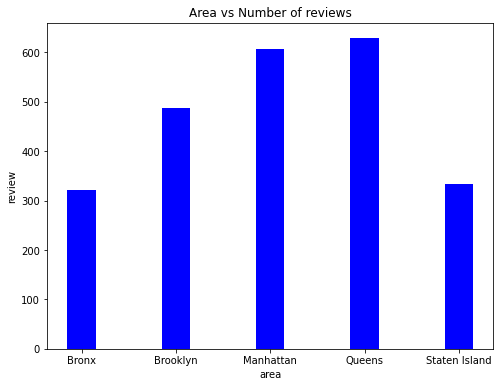

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(area, review, color ='blue',
        width = 0.3)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


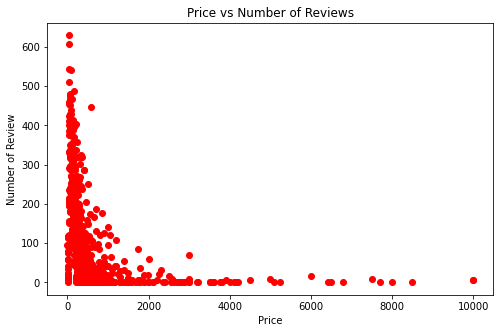

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.scatter(area, price,color ='red')
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

In [ ]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()

In [ ]:
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


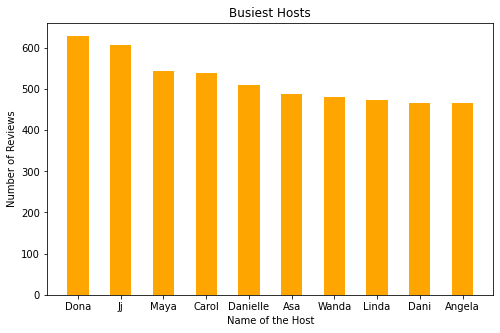

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='orange',
        width = 0.5)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

In [ ]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()

In [ ]:
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


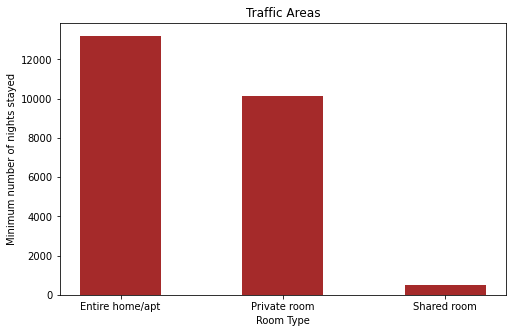

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='brown',
        width = 0.5)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

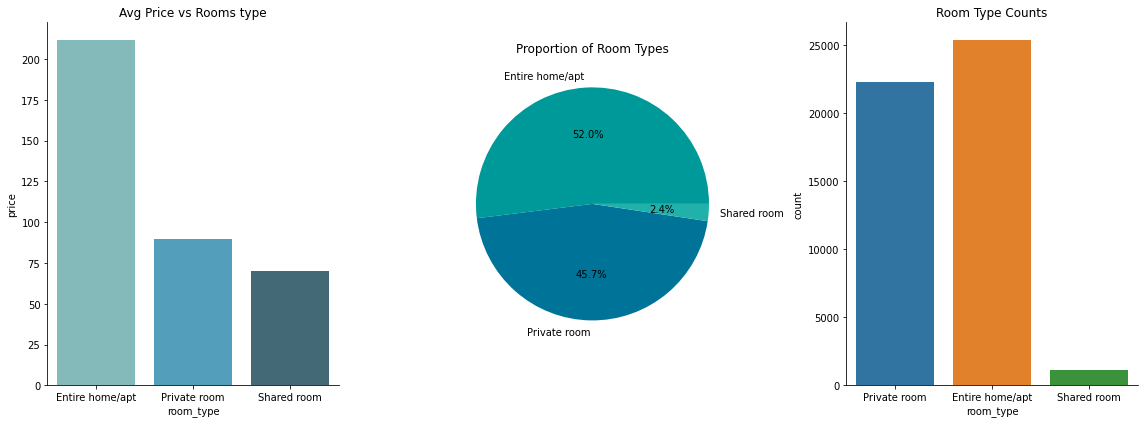

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
ax = axes.flatten()

mean_price_df = df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[1].set_title('Proportion of Room Types')

sns.countplot(data=df, x='room_type', ax=ax[2])
ax[2].set_title('Room Type Counts')

sns.despine(fig)
plt.tight_layout(h_pad=0.5, w_pad=0.8)